In [14]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd

first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [15]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder

  
# Grab the MCS data
pres = os.listdir('./xa_txt_files/PhaseComp_random_init')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
pres2 = os.listdir('./xa_txt_files/PhaseComp_bins_random_init')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres3 = os.listdir('./xa_txt_files/in_clust_random_init')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

C:\Users\Nick\Desktop\jupyter_analysis_updated
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [16]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [17]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('./xa_txt_files/PhaseComp_random_init')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

tauB  sizeBin_x  sizeBin_y  clust_size  bulk_all  bulk_A  bulk_B  \
0       0.0   5.016308   5.016308          10         0       0       0   
1       0.1   5.016308   5.016308         438         0       0       0   
2       0.2   5.016308   5.016308         580         0       0       0   
3       0.3   5.016308   5.016308         754         0       0       0   
4       0.4   5.016308   5.016308        1359         0       0       0   
...     ...        ...        ...         ...       ...     ...     ...   
1174  117.4   5.016308   5.016308       44165     24715   12374   12341   
1175  117.5   5.016308   5.016308       44171     24768   12358   12410   
1176  117.6   5.016308   5.016308       44277     26203   13101   13102   
1177  117.7   5.016308   5.016308       44081     27093   13572   13521   
1178  117.8   5.016308   5.016308       43844     25857   12920   12937   

      largest_bulk_all  largest_bulk_A  largest_bulk_B  int_all  int_A  int_B  \
0                    0               0               0    50000  25000  25000   
1                    0               0               0    50000  25000  25000   
2                    0               0               0    50000  25000  25000   
3                    0               0               0    50000  25000  25000   
4                    0               0               0    50000  25000  25000   
...                ...             ...             ...      ...    ...    ...   
1174             24715           12374           12341    20202  10129  10073   
1175             24768           12358           12410    20257  10195  10062   
1176             26203           13101           13102    18707   9411   9296   
1177             27093           13572           13521    17666   8874   8792   
1178             25857           12920           12937    18715   9422   9293   

      largest_int_all  largest_int_A  largest_int_B  gas_all  gas_A  gas_B  
0               50000          25000          25000        0      0      0  
1               50000          25000          25000        0      0      0  
2               50000          25000          25000        0      0      0  
3               50000          25000          25000        0      0      0  
4               50000          25000          25000        0      0      0  
...               ...            ...            ...      ...    ...    ...  
1174            20202          10129          10073     5083   2497   2586  
1175            20257          10195          10062     4975   2447   2528  
1176            18707           9411           9296     5090   2488   2602  
1177            17666           8874           8792     5241   2554   2687  
1178            18715           9422           9293     5428   2658   2770  

[1179 rows x 19 columns]

In [18]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\4098459835.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\4098459835.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\4098459835.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\4098459835.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index 

pe  peA  peB    xA  eps   phi  tauPer_dt
0  0    0  500  50.0  1.0  60.0   0.000001
1  0   50  500  50.0  1.0  60.0   0.000001
2  0  100  500  50.0  1.0  60.0   0.000001
3  0  150  500  50.0  1.0  60.0   0.000001
4  0  200  500  50.0  1.0  60.0   0.000001
5  0  300  500  50.0  1.0  60.0   0.000001
6  0  400  500  50.0  1.0  60.0   0.000001
7  0  500  500  50.0  1.0  60.0   0.000001

In [19]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

tauB  sizeBin_x  sizeBin_y  clust_size  bulk_all  bulk_A  bulk_B  \
0       0.0   5.016308   5.016308          10     19392    9670    9722   
1       0.1   5.016308   5.016308         352     10817    5508    5309   
2       0.2   5.016308   5.016308         425      8403    4213    4190   
3       0.3   5.016308   5.016308         291      8282    4145    4137   
4       0.4   5.016308   5.016308         547     12425    6245    6180   
...     ...        ...        ...         ...       ...     ...     ...   
1404  140.4   5.016308   5.016308         202      4501    2266    2235   
1405  140.5   5.016308   5.016308         439     12252    6155    6097   
1406  140.6   5.016308   5.016308         344     19517    9836    9681   
1407  140.7   5.016308   5.016308         277      8469    4242    4227   
1408  140.8   5.016308   5.016308         364     11850    5869    5981   

      largest_bulk_all  largest_bulk_A  largest_bulk_B  int_all  int_A  int_B  \
0                   70              25              45    30608  15330  15278   
1                   76              45              31    39183  19492  19691   
2                   86              44              42    41597  20787  20810   
3                   22              12              10    41718  20855  20863   
4                   93              38              55    37575  18755  18820   
...                ...             ...             ...      ...    ...    ...   
1404                12               8               4    45499  22734  22765   
1405                25              11              14    37748  18845  18903   
1406                84              41              43    30483  15164  15319   
1407                85              45              40    41531  20758  20773   
1408                81              41              40    38150  19131  19019   

      largest_int_all  largest_int_A  largest_int_B  gas_all  gas_A  gas_B  
0                 304            145            159        0      0      0  
1               39183          19492          19691        0      0      0  
2               41597          20787          20810        0      0      0  
3               41718          20855          20863        0      0      0  
4               37575          18755          18820        0      0      0  
...               ...            ...            ...      ...    ...    ...  
1404            45499          22734          22765        0      0      0  
1405            37748          18845          18903        0      0      0  
1406              290            138            152        0      0      0  
1407            41531          20758          20773        0      0      0  
1408            38150          19131          19019        0      0      0  

[1409 rows x 19 columns]

5.016308
5.016308


In [20]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres2 = []
os.chdir(parent)
os.chdir('./xa_txt_files/PhaseComp_bins_random_init')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres2[-1])

tauB  sizeBin_x  sizeBin_y  clust_size  bulk  largest_int   gas   int
0       0.0   5.016308   5.016308          10     0         2601     0  2601
1       0.1   5.016308   5.016308         438     0         2601     0  2601
2       0.2   5.016308   5.016308         580     0         2601     0  2601
3       0.3   5.016308   5.016308         754     0         2601     0  2601
4       0.4   5.016308   5.016308        1359     0         2601     0  2601
...     ...        ...        ...         ...   ...          ...   ...   ...
1174  117.4   5.016308   5.016308       44165   483          570  1548   570
1175  117.5   5.016308   5.016308       44171   487          595  1519   595
1176  117.6   5.016308   5.016308       44277   517          525  1559   525
1177  117.7   5.016308   5.016308       44081   536          498  1567   498
1178  117.8   5.016308   5.016308       43844   509          522  1570   522

[1179 rows x 8 columns]

In [21]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres2)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\2969436845.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params3 = params3.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\2969436845.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params3 = params3.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\2969436845.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params3 = params3.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\2969436845.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params3 = params3.append(df, ignore_index 

pe  peA  peB    xA  eps   phi  tauPer_dt
0  0    0  500  50.0  1.0  60.0   0.000001
1  0   50  500  50.0  1.0  60.0   0.000001
2  0  100  500  50.0  1.0  60.0   0.000001
3  0  150  500  50.0  1.0  60.0   0.000001
4  0  200  500  50.0  1.0  60.0   0.000001
5  0  300  500  50.0  1.0  60.0   0.000001
6  0  400  500  50.0  1.0  60.0   0.000001
7  0  500  500  50.0  1.0  60.0   0.000001

In [22]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres2)):
    # Ger rid of NaN in favor of 0
    all_pres2[i].fillna(0, inplace=True)

headers=list(all_pres2[0])
display(all_pres2[0])
print(all_pres2[0][headers[1]][0])
print(all_pres2[0][headers[2]][0])

tauB  sizeBin_x  sizeBin_y  clust_size  bulk  largest_int  gas   int
0       0.0   5.016308   5.016308          10  1009           16    0  1592
1       0.1   5.016308   5.016308         352   576         2025    0  2025
2       0.2   5.016308   5.016308         425   440         2161    0  2161
3       0.3   5.016308   5.016308         291   437         2164    0  2164
4       0.4   5.016308   5.016308         547   650         1951    0  1951
...     ...        ...        ...         ...   ...          ...  ...   ...
1404  140.4   5.016308   5.016308         202   235         2366    0  2366
1405  140.5   5.016308   5.016308         439   634         1967    0  1967
1406  140.6   5.016308   5.016308         344  1024           14    0  1577
1407  140.7   5.016308   5.016308         277   458         2143    0  2143
1408  140.8   5.016308   5.016308         364   621         1980    0  1980

[1409 rows x 8 columns]

5.016308
5.016308


In [23]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres3 = []
os.chdir(parent)
os.chdir('./xa_txt_files/in_clust_random_init')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres3[-1])

tauB  sizeBin_x  sizeBin_y  clust_size    all      A      B
0       0.0   1.127012   1.127012          10     10      4      6
1       0.1   1.127012   1.127012         438    438    203    235
2       0.2   1.127012   1.127012         580    580    303    277
3       0.3   1.127012   1.127012         754    754    386    368
4       0.4   1.127012   1.127012        1359   1359    669    690
...     ...        ...        ...         ...    ...    ...    ...
1494  149.4   1.127012   1.127012       43477  43477  21802  21675
1495  149.5   1.127012   1.127012       43689  43689  21885  21804
1496  149.6   1.127012   1.127012       43804  43804  21955  21849
1497  149.7   1.127012   1.127012       43722  43722  21875  21847
1498  149.8   1.127012   1.127012       43729  43729  21869  21860

[1499 rows x 7 columns]

In [24]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\1898260616.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params4 = params4.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\1898260616.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params4 = params4.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\1898260616.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params4 = params4.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22284\1898260616.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params4 = params4.append(df, ignore_index 

pe  peA  peB    xA  eps   phi  tauPer_dt
0  0    0  500  50.0  1.0  67.0   0.000001
1  0   25  500  50.0  1.0  67.0   0.000001
2  0   50  500  50.0  1.0  65.0   0.000001
3  0   75  500  50.0  1.0  65.0   0.000001
4  0  100  500  50.0  1.0  60.0   0.000001
5  0  150  500  50.0  1.0  60.0   0.000001
6  0  200  500  50.0  1.0  60.0   0.000001
7  0  300  500  50.0  1.0  60.0   0.000001
8  0  400  500  50.0  1.0  60.0   0.000001
9  0  500  500  50.0  1.0  60.0   0.000001

In [25]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres3)):
    # Ger rid of NaN in favor of 0
    all_pres3[i].fillna(0, inplace=True)

headers=list(all_pres3[0])
display(all_pres3[0])
print(all_pres3[0][headers[1]][0])
print(all_pres3[0][headers[2]][0])

tauB  sizeBin_x  sizeBin_y  clust_size    all     A      B
0       0.0   1.126041   1.126041          19     19     6     13
1       0.1   1.126041   1.126041         648    648   276    372
2       0.2   1.126041   1.126041        1434   1434   617    817
3       0.3   1.126041   1.126041         945    945   384    561
4       0.4   1.126041   1.126041        2049   2049   878   1171
...     ...        ...        ...         ...    ...   ...    ...
5581  558.1   1.126041   1.126041       28026  28026  9384  18642
5582  558.2   1.126041   1.126041       28265  28265  9468  18797
5583  558.3   1.126041   1.126041       27681  27681  9085  18596
5584  558.4   1.126041   1.126041       27761  27761  9090  18671
5585  558.5   1.126041   1.126041       27959  27959  9211  18748

[5586 rows x 7 columns]

1.126041
1.126041


In [26]:
import matplotlib.pyplot as plt




def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 500./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=3, clip_on=False)

    ax.text((xmax+xmin)/2., yy+.11*yspan, text, ha='center', va='bottom', fontsize=2.7*fsize)
    






def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(4,1, figsize=(15,20))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"

interpart_peA = np.array([])
interpart_peB = np.array([])
interpart_xA = np.array([])
ind = 0

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


for k in range(0, len(all_pres)):
    if all_pres[k].empty:
        continue
    for l in range(0, len(all_pres2)):
        if all_pres2[l].empty:
            continue
        if (params2['peA'][k]==params3['peA'][l]) & (params2['peB'][k]==params3['peB'][l]):
            for m in range(0, len(all_pres3)):
                if all_pres3[m].empty:
                    continue
                if (params2['peA'][k]==params4['peA'][m]) & (params2['peB'][k]==params4['peB'][m]):
    
    
                    if (params2['peA'][k] == 100) | (params2['peA'][k] == 150) | (params2['peA'][k] == 200) | (params2['peA'][k] == 400):
                        print(params2['peA'][k])
                        time_k = all_pres[k]['tauB']
                        time_l = all_pres2[l]['tauB']
                        time_m = all_pres3[m]['tauB']

                        #time_ss = np.where((time_k>=150))[0]

                        print(len(time_k))
                        
                        step_size = 2
                        
                        frac_ssA = all_pres3[m]['A'][::step_size]# / all_pres3[m]['all'][::step_size] 
                        frac_ssB = all_pres3[m]['B'][::step_size]# / all_pres3[m]['all'][::step_size]
                        
                        frac_ssA_orig = all_pres3[m]['A']# / all_pres3[m]['all'] 
                        frac_ssB_orig = all_pres3[m]['B']#/  all_pres3[m]['all']

                        
                        #if all_pres[k]['bulk'][::step_size]>0:
                        dens_ssA_bulk = (all_pres[k]['bulk_A'][::step_size] / (all_pres2[l]['bulk'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_bulk = (all_pres[k]['bulk_B'][::step_size] / (all_pres2[l]['bulk'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_int = (all_pres[k]['int_A'][::step_size] / (all_pres2[l]['int'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_int = (all_pres[k]['int_B'][::step_size] / (all_pres2[l]['int'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_dense = ((all_pres[k]['bulk_A'][::step_size]+all_pres[k]['int_A'][::step_size]) / ((all_pres2[l]['bulk'][::step_size] + all_pres2[l]['int'][::step_size]) * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_dense = ((all_pres[k]['bulk_B'][::step_size]+all_pres[k]['int_B'][::step_size]) / ((all_pres2[l]['bulk'][::step_size] + all_pres2[l]['int'][::step_size]) * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_bulk_orig = (all_pres[k]['bulk_A'] / (all_pres2[l]['bulk'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_bulk_orig = (all_pres[k]['bulk_B'] / (all_pres2[l]['bulk'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        
                        dens_ssA_int_orig = (all_pres[k]['int_A'] / (all_pres2[l]['int'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_int_orig = (all_pres[k]['int_B'] / (all_pres2[l]['int'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        
                        dens_ssA_dense_orig = ((all_pres[k]['bulk_A']+all_pres[k]['int_A']) / ((all_pres2[l]['bulk'] + all_pres2[l]['int']) * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_dense_orig = ((all_pres[k]['bulk_B']+all_pres[k]['int_B']) / ((all_pres2[l]['bulk'] + all_pres2[l]['int']) * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))

                        
                        #dens_ssA_int = (all_pres[k]['int_A'][::step_size] / (all_pres[k]['int'][::step_size] * all_pres[k]['sizeBin_x'][::step_size] * all_pres[k]['sizeBin_y'][::step_size]))
                        #dens_ssB_int = (all_pres[k]['int_B'][::step_size] / (all_pres[k]['int'][::step_size] * all_pres[k]['sizeBin_x'][::step_size] * all_pres[k]['sizeBin_y'][::step_size]))
                        
                        
                        

                        ax1[ind].plot(time_m[::step_size], frac_ssA, linewidth=3.0, linestyle='solid', c=new_blue)
                        ax1[ind].plot(time_m[::step_size], frac_ssB, linewidth=3.0, linestyle='solid', c=new_red)
                        test_id = np.where(time_m>=100)[0]
                        #ax1[ind].plot([0, 600], [np.mean(frac_ssA_orig[test_id]), np.mean(frac_ssA_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_blue)
                        #ax1[ind].plot([0, 600], [np.mean(frac_ssB_orig[test_id]), np.mean(frac_ssB_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_red)
                        
                        
                        #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='solid', c=new_blue)
                        #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='solid', c=new_red)
                        
                        #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='dashed', c=new_blue)
                        #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='dashed', c=new_red)
                        
                        #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='dotted', c=new_blue)
                        #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='dotted', c=new_red)
                        
                        #test_id = np.where(time_k>=100)[0]
                        #ax1[ind].plot([0, 600], [np.mean(dens_ssA_orig[test_id]), np.mean(dens_ssA_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_blue)
                        #ax1[ind].plot([0, 600], [np.mean(dens_ssB_orig[test_id]), np.mean(dens_ssB_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_red)

                        
                        
                        #for z in range(0, len(time_local_minimaA)):
                        #    ax1[ind].plot([time_local_minimaA[z], time_local_minimaA[z]], [0, 500], linestyle='dotted', linewidth=1.5, color='blue')
                        #for z in range(0, len(time_local_maximaB)):
                        #    ax1[ind].plot([time_local_maximaB[z], time_local_maximaB[z]], [0, 500], linestyle='dotted', linewidth=1.5, color='red')


                        interpart_peA = np.append(interpart_peA, params2['peA'][k])
                        interpart_peB = np.append(interpart_peB, params2['peB'][k])
                        interpart_xA = np.append(interpart_xA, params2['xA'][k])

                        fsize=10
                        ax1[ind].tick_params(axis='y', labelsize=fsize*2.3)
                        ax1[ind].tick_params(axis='x', labelsize=fsize*2.3)

                        loc = MultipleLocator(base=50)
                        ax1[ind].xaxis.set_major_locator(loc)
                        loc = MultipleLocator(base=25)
                        ax1[ind].xaxis.set_minor_locator(loc)


                        #ax1[ind].set_ylabel(r'Cluster Size ($N$)', fontsize=fsize*2.5)    
                        ax1[ind].set_ylabel(r'Cluster Size ($N_\mathrm{D}$)', fontsize=fsize*2.5) 

                        if ind<3: 
                            ax1[ind].xaxis.set_tick_params(labelbottom=False)

                        ind += 1

ax1[0].set_xlim([390, 440])
ax1[1].set_xlim([0.0, 50])
ax1[2].set_xlim([0.0, 50])
ax1[3].set_xlim([0.0, 50])

ax1[1].plot([18, 18], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
ax1[2].plot([13.5, 13.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
ax1[3].plot([6.5, 6.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')

ax1[1].fill_betweenx(y=[-500000, 500000], x1=[18, 18], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
ax1[1].fill_betweenx(y=[-500000, 500000], x1=[3, 3], x2=[18, 18], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
ax1[1].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[3, 3], zorder=-1, color='red', edgecolor='None', alpha=0.2)

ax1[2].fill_betweenx(y=[-500000, 500000], x1=[13.5, 13.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
ax1[2].fill_betweenx(y=[-500000, 500000], x1=[1, 1], x2=[13.5, 13.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
ax1[2].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[1, 1], zorder=-1, color='red', edgecolor='None', alpha=0.2)

ax1[3].fill_betweenx(y=[-500000, 500000], x1=[6.5, 6.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
ax1[3].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[6.5, 6.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)




ax1[1].plot([3, 3], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
ax1[2].plot([1, 1], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
ax1[3].plot([0, 0], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')
ax1[3].set_xlabel(r'Simulation Time ($\tau_\mathrm{B}$)', fontsize=fsize*2.5)                    

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
#ax1[0].set_ylim([0.0,1.0])
#ax1[1].set_ylim([0.0,1.0])
#ax1[2].set_ylim([0.0,1.0])
#ax1[3].set_ylim([0.0,1.0])

#ax1[0].set_ylim([0.0,2.0])
#ax1[1].set_ylim([0.0,2.0])
#ax1[2].set_ylim([0.0,2.0])
#ax1[3].set_ylim([0.0,2.0])


ax1[0].set_ylim([0.0,25000])
ax1[1].set_ylim([0.0,25000])
ax1[2].set_ylim([0.0,25000])
ax1[3].set_ylim([0.0,25000])

#ax1[0].set_yticks([0.65, 1.0, 1.35])
#ax1[0].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[1].set_yticks([0.65, 1.0, 1.35])
#ax1[1].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[2].set_yticks([0.65, 1.0, 1.35])
#ax1[2].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[3].set_yticks([0.65, 1.0, 1.35])
#ax1[3].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

#one_leg = ax1[0,0].legend(handles=fast_leg, loc='center',
#             columnspacing=0.0, handletextpad=-0.1,
#             bbox_transform=ax1[0,0].transAxes, bbox_to_anchor=[0.11, 0.78],
#             fontsize=fsize*2.5, frameon=True, ncol=1, edgecolor='black')
#one_leg.get_frame().set_linewidth(2.0)
#one_leg.get_frame().set_alpha(1.0)
#ax1[0,0].add_artist(one_leg)
"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10



msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D



regime1_c = '#fdfd96'             

#test_id = np.where(time_num_dens>100)[0]
#ax1[1,0].plot([0, 500], [np.mean(int_nA_arr[test_id]), np.mean(int_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(int_nB_arr[test_id]), np.mean(int_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(bulk_nA_arr[test_id]), np.mean(bulk_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(bulk_nB_arr[test_id]), np.mean(bulk_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#ax1[0,0].plot([0, 500], [np.mean(int_nA_arr[test_id]), np.mean(int_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(int_nB_arr[test_id]), np.mean(int_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(bulk_nA_arr[test_id]), np.mean(bulk_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(bulk_nB_arr[test_id]), np.mean(bulk_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D
                    
fsize=10

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

t1 = ax1[0].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.3$', fontsize=fsize*2.5, transform=ax1[0].transAxes)
t2 = ax1[1].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.4$', fontsize=fsize*2.5, transform=ax1[1].transAxes)
t3 = ax1[2].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.8$', fontsize=fsize*2.5, transform=ax1[2].transAxes)
t4 = ax1[3].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=1.0$', fontsize=fsize*2.5, transform=ax1[3].transAxes)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t2.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t3.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t4.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))

fast_leg=[]
#fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*2,
#                      markeredgecolor=new_dense,
#                      markerfacecolor=new_dense, 
#                      label='All', markersize=(1*2.5*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*2,
                      markeredgecolor=new_blue,
                      markerfacecolor=new_blue, 
                      label=r'Slow', markersize=(1*2.5*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*2,
                      markeredgecolor=new_red,
                      markerfacecolor=new_red, 
                      label='Fast', markersize=(1*2.5*msz * mkSz[0])))
one_leg = ax1[0].legend(handles=fast_leg, loc='center',
             columnspacing=0.3, handletextpad=-0.1,
             bbox_transform=ax1[0].transAxes, bbox_to_anchor=[0.53, 0.895],
             fontsize=fsize*2.4, frameon=False, ncol=3)
ax1[0].add_artist(one_leg)

#draw_brace(ax1[0], (0,3), 25000, r'Dilute')
#draw_brace(ax1[0], (3,18), 25000, r'MIPS')
#draw_brace(ax1[0], (18,50), 25000, r'Steady State')


fig.subplots_adjust(wspace=0.02)
ax1[2].set_xlabel(r'Simulation Time ($\tau$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.savefig('clust_flucts.png',  dpi=200, pad_inches=0.0, transparent=False, bbox_inches='tight')
plt.show()


100
1491
150
1122
200
861
400
878


In [71]:
ar_cont = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]

chi_arr_cont = pd.read_csv(r"C:\Users\Nick\Desktop\chi_arr.csv", header= None,
                        encoding= 'unicode_escape')

time_arr_cont = pd.read_csv(r"C:\Users\Nick\Desktop\time_arr.csv", header= None,
                        encoding= 'unicode_escape')
xf_cont = [0.499999876140324,0.508923877974172,0.518225614703241,0.527615952719285,0.537155399807130,0.548774122215493,0.561867267369935,0.569734780290837,0.578808375668029,0.589717239934203,0.603705334744439,0.623813333155284,0.652496009291641,0.680000000000000]


In [89]:
import matplotlib.pyplot as plt




def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 500./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=3, clip_on=False)

    ax.text((xmax+xmin)/2., yy+.11*yspan, text, ha='center', va='bottom', fontsize=2.7*fsize)
    






def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(4,1, figsize=(15,20))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"

interpart_peA = np.array([])
interpart_peB = np.array([])
interpart_xA = np.array([])
ind = 0

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


for k in range(0, len(all_pres)):
    if all_pres[k].empty:
        continue
    for l in range(0, len(all_pres2)):
        if all_pres2[l].empty:
            continue
        if (params2['peA'][k]==params3['peA'][l]) & (params2['peB'][k]==params3['peB'][l]):
            for m in range(0, len(all_pres3)):
                if all_pres3[m].empty:
                    continue
                if (params2['peA'][k]==params4['peA'][m]) & (params2['peB'][k]==params4['peB'][m]):
    
    
                    if (params2['peA'][k] == 100) | (params2['peA'][k] == 150) | (params2['peA'][k] == 200) | (params2['peA'][k] == 400):
                        print(params2['peA'][k])
                        time_k = all_pres[k]['tauB']
                        time_l = all_pres2[l]['tauB']
                        time_m = all_pres3[m]['tauB']

                        #time_ss = np.where((time_k>=150))[0]

                        print(len(time_k))
                        
                        step_size = 2
                        
                        frac_ssA = all_pres3[m]['A'][::step_size] / all_pres3[m]['all'][::step_size] 
                        frac_ssB = all_pres3[m]['B'][::step_size] / all_pres3[m]['all'][::step_size]
                        
                        frac_ssA_orig = all_pres3[m]['A'] / all_pres3[m]['all'] 
                        frac_ssB_orig = all_pres3[m]['B']/  all_pres3[m]['all']

                        
                        #if all_pres[k]['bulk'][::step_size]>0:
                        dens_ssA_bulk = (all_pres[k]['bulk_A'][::step_size] / (all_pres2[l]['bulk'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_bulk = (all_pres[k]['bulk_B'][::step_size] / (all_pres2[l]['bulk'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_int = (all_pres[k]['int_A'][::step_size] / (all_pres2[l]['int'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_int = (all_pres[k]['int_B'][::step_size] / (all_pres2[l]['int'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_dense = ((all_pres[k]['bulk_A'][::step_size]+all_pres[k]['int_A'][::step_size]) / ((all_pres2[l]['bulk'][::step_size] + all_pres2[l]['int'][::step_size]) * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_dense = ((all_pres[k]['bulk_B'][::step_size]+all_pres[k]['int_B'][::step_size]) / ((all_pres2[l]['bulk'][::step_size] + all_pres2[l]['int'][::step_size]) * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_bulk_orig = (all_pres[k]['bulk_A'] / (all_pres2[l]['bulk'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_bulk_orig = (all_pres[k]['bulk_B'] / (all_pres2[l]['bulk'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        
                        dens_ssA_int_orig = (all_pres[k]['int_A'] / (all_pres2[l]['int'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_int_orig = (all_pres[k]['int_B'] / (all_pres2[l]['int'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        
                        dens_ssA_dense_orig = ((all_pres[k]['bulk_A']+all_pres[k]['int_A']) / ((all_pres2[l]['bulk'] + all_pres2[l]['int']) * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_dense_orig = ((all_pres[k]['bulk_B']+all_pres[k]['int_B']) / ((all_pres2[l]['bulk'] + all_pres2[l]['int']) * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))

                        
                        #dens_ssA_int = (all_pres[k]['int_A'][::step_size] / (all_pres[k]['int'][::step_size] * all_pres[k]['sizeBin_x'][::step_size] * all_pres[k]['sizeBin_y'][::step_size]))
                        #dens_ssB_int = (all_pres[k]['int_B'][::step_size] / (all_pres[k]['int'][::step_size] * all_pres[k]['sizeBin_x'][::step_size] * all_pres[k]['sizeBin_y'][::step_size]))
                        
                        
                        

                        #ax1[ind].plot(time_m[::step_size], frac_ssA, linewidth=3.0, linestyle='solid', c=new_blue)
                        
                        if ind>0:
                            test_id = np.where(time_m>=100)[0]
                        else:
                            test_id = np.where(time_m>=400)[0]
                        ax1[ind].plot(time_m[::step_size], frac_ssB-np.mean(frac_ssB_orig[test_id]), linewidth=3.0, linestyle='solid', c=new_red)
                        #ax1[ind].plot([0, 600], [np.mean(frac_ssA_orig[test_id]), np.mean(frac_ssA_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_blue)
                        #ax1[ind].plot([0, 600], [np.mean(frac_ssB_orig[test_id]), np.mean(frac_ssB_orig[test_id])], linewidth=3.0, linestyle='dotted', c='black')
                        
                        
                        #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='solid', c=new_blue)
                        #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='solid', c=new_red)
                        
                        #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='dashed', c=new_blue)
                        #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='dashed', c=new_red)
                        
                        #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='dotted', c=new_blue)
                        #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='dotted', c=new_red)
                        
                        #test_id = np.where(time_k>=100)[0]
                        #ax1[ind].plot([0, 600], [np.mean(dens_ssA_orig[test_id]), np.mean(dens_ssA_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_blue)
                        #ax1[ind].plot([0, 600], [np.mean(dens_ssB_orig[test_id]), np.mean(dens_ssB_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_red)

                        
                        
                        #for z in range(0, len(time_local_minimaA)):
                        #    ax1[ind].plot([time_local_minimaA[z], time_local_minimaA[z]], [0, 500], linestyle='dotted', linewidth=1.5, color='blue')
                        #for z in range(0, len(time_local_maximaB)):
                        #    ax1[ind].plot([time_local_maximaB[z], time_local_maximaB[z]], [0, 500], linestyle='dotted', linewidth=1.5, color='red')


                        interpart_peA = np.append(interpart_peA, params2['peA'][k])
                        interpart_peB = np.append(interpart_peB, params2['peB'][k])
                        interpart_xA = np.append(interpart_xA, params2['xA'][k])

                        fsize=10
                        ax1[ind].tick_params(axis='y', labelsize=fsize*2.3)
                        ax1[ind].tick_params(axis='x', labelsize=fsize*2.3)

                        loc = MultipleLocator(base=5)
                        ax1[ind].xaxis.set_major_locator(loc)
                        loc = MultipleLocator(base=2.5)
                        ax1[ind].xaxis.set_minor_locator(loc)
                        
                        loc = MultipleLocator(base=0.06)
                        ax1[ind].yaxis.set_major_locator(loc)
                        loc = MultipleLocator(base=0.03)
                        ax1[ind].yaxis.set_minor_locator(loc)


                        

                        #ax1[ind].set_ylabel(r'Cluster Size ($N$)', fontsize=fsize*2.5)    

                        if ind<3: 
                            ax1[ind].xaxis.set_tick_params(labelbottom=False)

                        ind += 1
print(time_arr_cont.iloc[:,-4].values)
test_1 = np.where(time_arr_cont.iloc[:,-3].values.astype(float)>0)[0]
#print(test_1)
#print(ar_cont[-4])
#stop
print(chi_arr_cont.iloc[:,-4].values.astype(float)[test_1])

test_1 = np.insert(test_1,0,0)
ax1[0].plot(393.6+time_arr_cont.iloc[:,-3].values.astype(float)[test_1], chi_arr_cont.iloc[:,-3].values.astype(float)[test_1]-xf_cont[-3], linewidth=3.0, linestyle='dashed', c=new_red)
ax1[0].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

test_1 = np.where(time_arr_cont.iloc[:,-6].values.astype(float)>0)[0]
test_1 = np.insert(test_1,0,0)
ax1[1].plot(2+time_arr_cont.iloc[:,-6].values.astype(float)[test_1], chi_arr_cont.iloc[:,-6].values.astype(float)[test_1]-xf_cont[-6], linewidth=3.0, linestyle='dashed', c=new_red)
ax1[1].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

test_1 = np.where(time_arr_cont.iloc[:,-8].values.astype(float)>0)[0]
test_1 = np.insert(test_1,0,0)

ax1[2].plot(0.8+time_arr_cont.iloc[:,-8].values.astype(float)[test_1], chi_arr_cont.iloc[:,-8].values.astype(float)[test_1]-xf_cont[-8], linewidth=3.0, linestyle='dashed', c=new_red)
ax1[2].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

test_1 = np.where(time_arr_cont.iloc[:,-12].values.astype(float)>0)[0]
test_1 = np.insert(test_1,0,0)
ax1[3].plot(0.2+time_arr_cont.iloc[:,-12].values.astype(float)[test_1], chi_arr_cont.iloc[:,-12].values.astype(float)[test_1]-xf_cont[-12], linewidth=3.0, linestyle='dashed', c=new_red)
ax1[3].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

ax1[2].set_ylabel(r'Fast Particle Fraction ($\chi^\mathrm{F}-\langle\chi^\mathrm{F}\rangle_\mathrm{SS}$)', fontsize=fsize*2.5) 
                    
ax1[0].set_xlim([393.6, 412.6])
ax1[1].set_xlim([2.0, 19])
ax1[2].set_xlim([0.8, 19])
ax1[3].set_xlim([0.2, 19])

#ax1[0].plot([399.5, 399.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[1].plot([18, 18], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[2].plot([13.5, 13.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[3].plot([6.5, 6.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')

#ax1[0].fill_betweenx(y=[-500000, 500000], x1=[399.5, 399.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[0].fill_betweenx(y=[-500000, 500000], x1=[393.6, 393.6], x2=[399.5, 399.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
#ax1[0].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[393.8, 393.8], zorder=-1, color='red', edgecolor='None', alpha=0.2)


#ax1[1].fill_betweenx(y=[-500000, 500000], x1=[18, 18], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[1].fill_betweenx(y=[-500000, 500000], x1=[2, 2], x2=[18, 18], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
#ax1[1].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[2, 2], zorder=-1, color='red', edgecolor='None', alpha=0.2)

#ax1[2].fill_betweenx(y=[-500000, 500000], x1=[13.5, 13.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[2].fill_betweenx(y=[-500000, 500000], x1=[0.8, 0.8], x2=[13.5, 13.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
#ax1[2].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[0.8, 0.8], zorder=-1, color='red', edgecolor='None', alpha=0.2)

#ax1[3].fill_betweenx(y=[-500000, 500000], x1=[6.5, 6.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[3].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[6.5, 6.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)


#ax1[0].plot([393.8, 393.8], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[1].plot([2, 2], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[2].plot([0.8, 0.8], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[3].plot([0, 0], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')
ax1[3].set_xlabel(r'Simulation Time ($\tau_\mathrm{B}$)', fontsize=fsize*2.5)                    

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[0].set_ylim([-0.15,0.1])
ax1[1].set_ylim([-0.15,0.1])
ax1[2].set_ylim([-0.15,0.1])
ax1[3].set_ylim([-0.15,0.1])

#ax1[0].set_ylim([0.0,2.0])
#ax1[1].set_ylim([0.0,2.0])
#ax1[2].set_ylim([0.0,2.0])
#ax1[3].set_ylim([0.0,2.0])


#ax1[0].set_ylim([0.0,25000])
#ax1[1].set_ylim([0.0,25000])
#ax1[2].set_ylim([0.0,25000])
#ax1[3].set_ylim([0.0,25000])

#ax1[0].set_yticks([0.65, 1.0, 1.35])
#ax1[0].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[1].set_yticks([0.65, 1.0, 1.35])
#ax1[1].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[2].set_yticks([0.65, 1.0, 1.35])
#ax1[2].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[3].set_yticks([0.65, 1.0, 1.35])
#ax1[3].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

#one_leg = ax1[0,0].legend(handles=fast_leg, loc='center',
#             columnspacing=0.0, handletextpad=-0.1,
#             bbox_transform=ax1[0,0].transAxes, bbox_to_anchor=[0.11, 0.78],
#             fontsize=fsize*2.5, frameon=True, ncol=1, edgecolor='black')
#one_leg.get_frame().set_linewidth(2.0)
#one_leg.get_frame().set_alpha(1.0)
#ax1[0,0].add_artist(one_leg)
"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10



msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D



regime1_c = '#fdfd96'             

#test_id = np.where(time_num_dens>100)[0]
#ax1[1,0].plot([0, 500], [np.mean(int_nA_arr[test_id]), np.mean(int_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(int_nB_arr[test_id]), np.mean(int_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(bulk_nA_arr[test_id]), np.mean(bulk_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(bulk_nB_arr[test_id]), np.mean(bulk_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#ax1[0,0].plot([0, 500], [np.mean(int_nA_arr[test_id]), np.mean(int_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(int_nB_arr[test_id]), np.mean(int_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(bulk_nA_arr[test_id]), np.mean(bulk_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(bulk_nB_arr[test_id]), np.mean(bulk_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D
                    
fsize=10

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

t1 = ax1[0].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.2$', fontsize=fsize*2.5, transform=ax1[0].transAxes)
t2 = ax1[1].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.3$', fontsize=fsize*2.5, transform=ax1[1].transAxes)
t3 = ax1[2].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.4$', fontsize=fsize*2.5, transform=ax1[2].transAxes)
t4 = ax1[3].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.8$', fontsize=fsize*2.5, transform=ax1[3].transAxes)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t2.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t3.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t4.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))



fast_leg=[]
fast_leg.append(Line2D([0], [0], marker='o', markeredgewidth=1.8*2,
                      markeredgecolor='None',
                      markerfacecolor='None', linestyle='solid', lw=3, color=new_red,
                      label='Simulation', markersize=(0.85*3.3*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], marker='+', markeredgewidth=1.8*2,
                      markeredgecolor='None',
                      markerfacecolor='None', linestyle='dashed', lw=3, color=new_red,
                      label='Model', markersize=(3.3*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], marker='+', markeredgewidth=1.8*2,
                      markeredgecolor='None',
                      markerfacecolor='None', linestyle='dotted', lw=3, color='black',
                      label='Steady State', markersize=(3.3*msz * mkSz[0])))
#one_leg = ax3.legend(handles=fast_leg, loc='center',
#             columnspacing=0.08, handletextpad=0.4,
#             bbox_transform=ax3.transAxes, bbox_to_anchor=[0.795, 0.895],
#             fontsize=fsize*2.4, frameon=True, ncol=1, edgecolor='black')
one_leg = ax1[0].legend(handles=fast_leg, loc='center',
             columnspacing=1.3, handletextpad=0.4,
             bbox_transform=ax1[0].transAxes, bbox_to_anchor=[0.43, 0.87],
             fontsize=fsize*2.4, frameon=False, ncol=3)
#one_leg.get_frame().set_linewidth(2.0)
#one_leg.get_frame().set_alpha(1.0)
ax1[0].add_artist(one_leg)

#draw_brace(ax1[0], (390.1,393.7), 0.72, r'Dilute')
#draw_brace(ax1[0], (393.9,399.4), 0.72, r'Cluster Growth')
#draw_brace(ax1[0], (399.6,414.9), 0.72, r'Steady State')


fig.subplots_adjust(wspace=0.02)
ax1[2].set_xlabel(r'Simulation Time ($\tau$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.savefig('si_fig_33.png',  dpi=200, pad_inches=0.0, transparent=False, bbox_inches='tight')
plt.show()


100
1491
150
1122
200
861
400
878
[ 0.    0.06  0.12  0.18  0.24  0.3   0.36  0.42  0.48  0.54  0.6   0.66
  0.72  0.78  0.84  0.9   0.96  1.02  1.08  1.14  1.2   1.26  1.32  1.38
  1.44  1.5   1.56  1.62  1.68  1.74  1.8   1.86  1.92  1.98  2.04  2.1
  2.16  2.22  2.28  2.34  2.4   2.46  2.52  2.58  2.64  2.7   2.76  2.82
  2.88  2.94  3.    3.06  3.12  3.18  3.24  3.3   3.36  3.42  3.48  3.54
  3.6   3.66  3.72  3.78  3.84  3.9   3.96  4.02  4.08  4.14  4.2   4.26
  4.32  4.38  4.44  4.5   4.56  4.62  4.68  4.74  4.8   4.86  4.92  4.98
  5.04  5.1   5.16  5.22  5.28  5.34  5.4   5.46  5.52  5.58  5.64  5.7
  5.76  5.82  5.88  5.94  6.    6.06  6.12  6.18  6.24  6.3   6.36  6.42
  6.48  6.54  6.6   6.66  6.72  6.78  6.84  6.9   6.96  7.02  7.08  7.14
  7.2   7.26  7.32  7.38  7.44  7.5   7.56  7.62  7.68  7.74  7.8   7.86
  7.92  7.98  8.04  8.1   8.16  8.22  8.28  8.34  8.4   8.46  8.52  8.58
  8.64  8.7   8.76  8.82  8.88  8.94  9.    9.06  9.12  9.18  9.24  9.3
  9.36  9.42  9.48  

100
1491
150
1122
200
861
400
878
[ 0.    0.06  0.12  0.18  0.24  0.3   0.36  0.42  0.48  0.54  0.6   0.66
  0.72  0.78  0.84  0.9   0.96  1.02  1.08  1.14  1.2   1.26  1.32  1.38
  1.44  1.5   1.56  1.62  1.68  1.74  1.8   1.86  1.92  1.98  2.04  2.1
  2.16  2.22  2.28  2.34  2.4   2.46  2.52  2.58  2.64  2.7   2.76  2.82
  2.88  2.94  3.    3.06  3.12  3.18  3.24  3.3   3.36  3.42  3.48  3.54
  3.6   3.66  3.72  3.78  3.84  3.9   3.96  4.02  4.08  4.14  4.2   4.26
  4.32  4.38  4.44  4.5   4.56  4.62  4.68  4.74  4.8   4.86  4.92  4.98
  5.04  5.1   5.16  5.22  5.28  5.34  5.4   5.46  5.52  5.58  5.64  5.7
  5.76  5.82  5.88  5.94  6.    6.06  6.12  6.18  6.24  6.3   6.36  6.42
  6.48  6.54  6.6   6.66  6.72  6.78  6.84  6.9   6.96  7.02  7.08  7.14
  7.2   7.26  7.32  7.38  7.44  7.5   7.56  7.62  7.68  7.74  7.8   7.86
  7.92  7.98  8.04  8.1   8.16  8.22  8.28  8.34  8.4   8.46  8.52  8.58
  8.64  8.7   8.76  8.82  8.88  8.94  9.    9.06  9.12  9.18  9.24  9.3
  9.36  9.42  9.48  

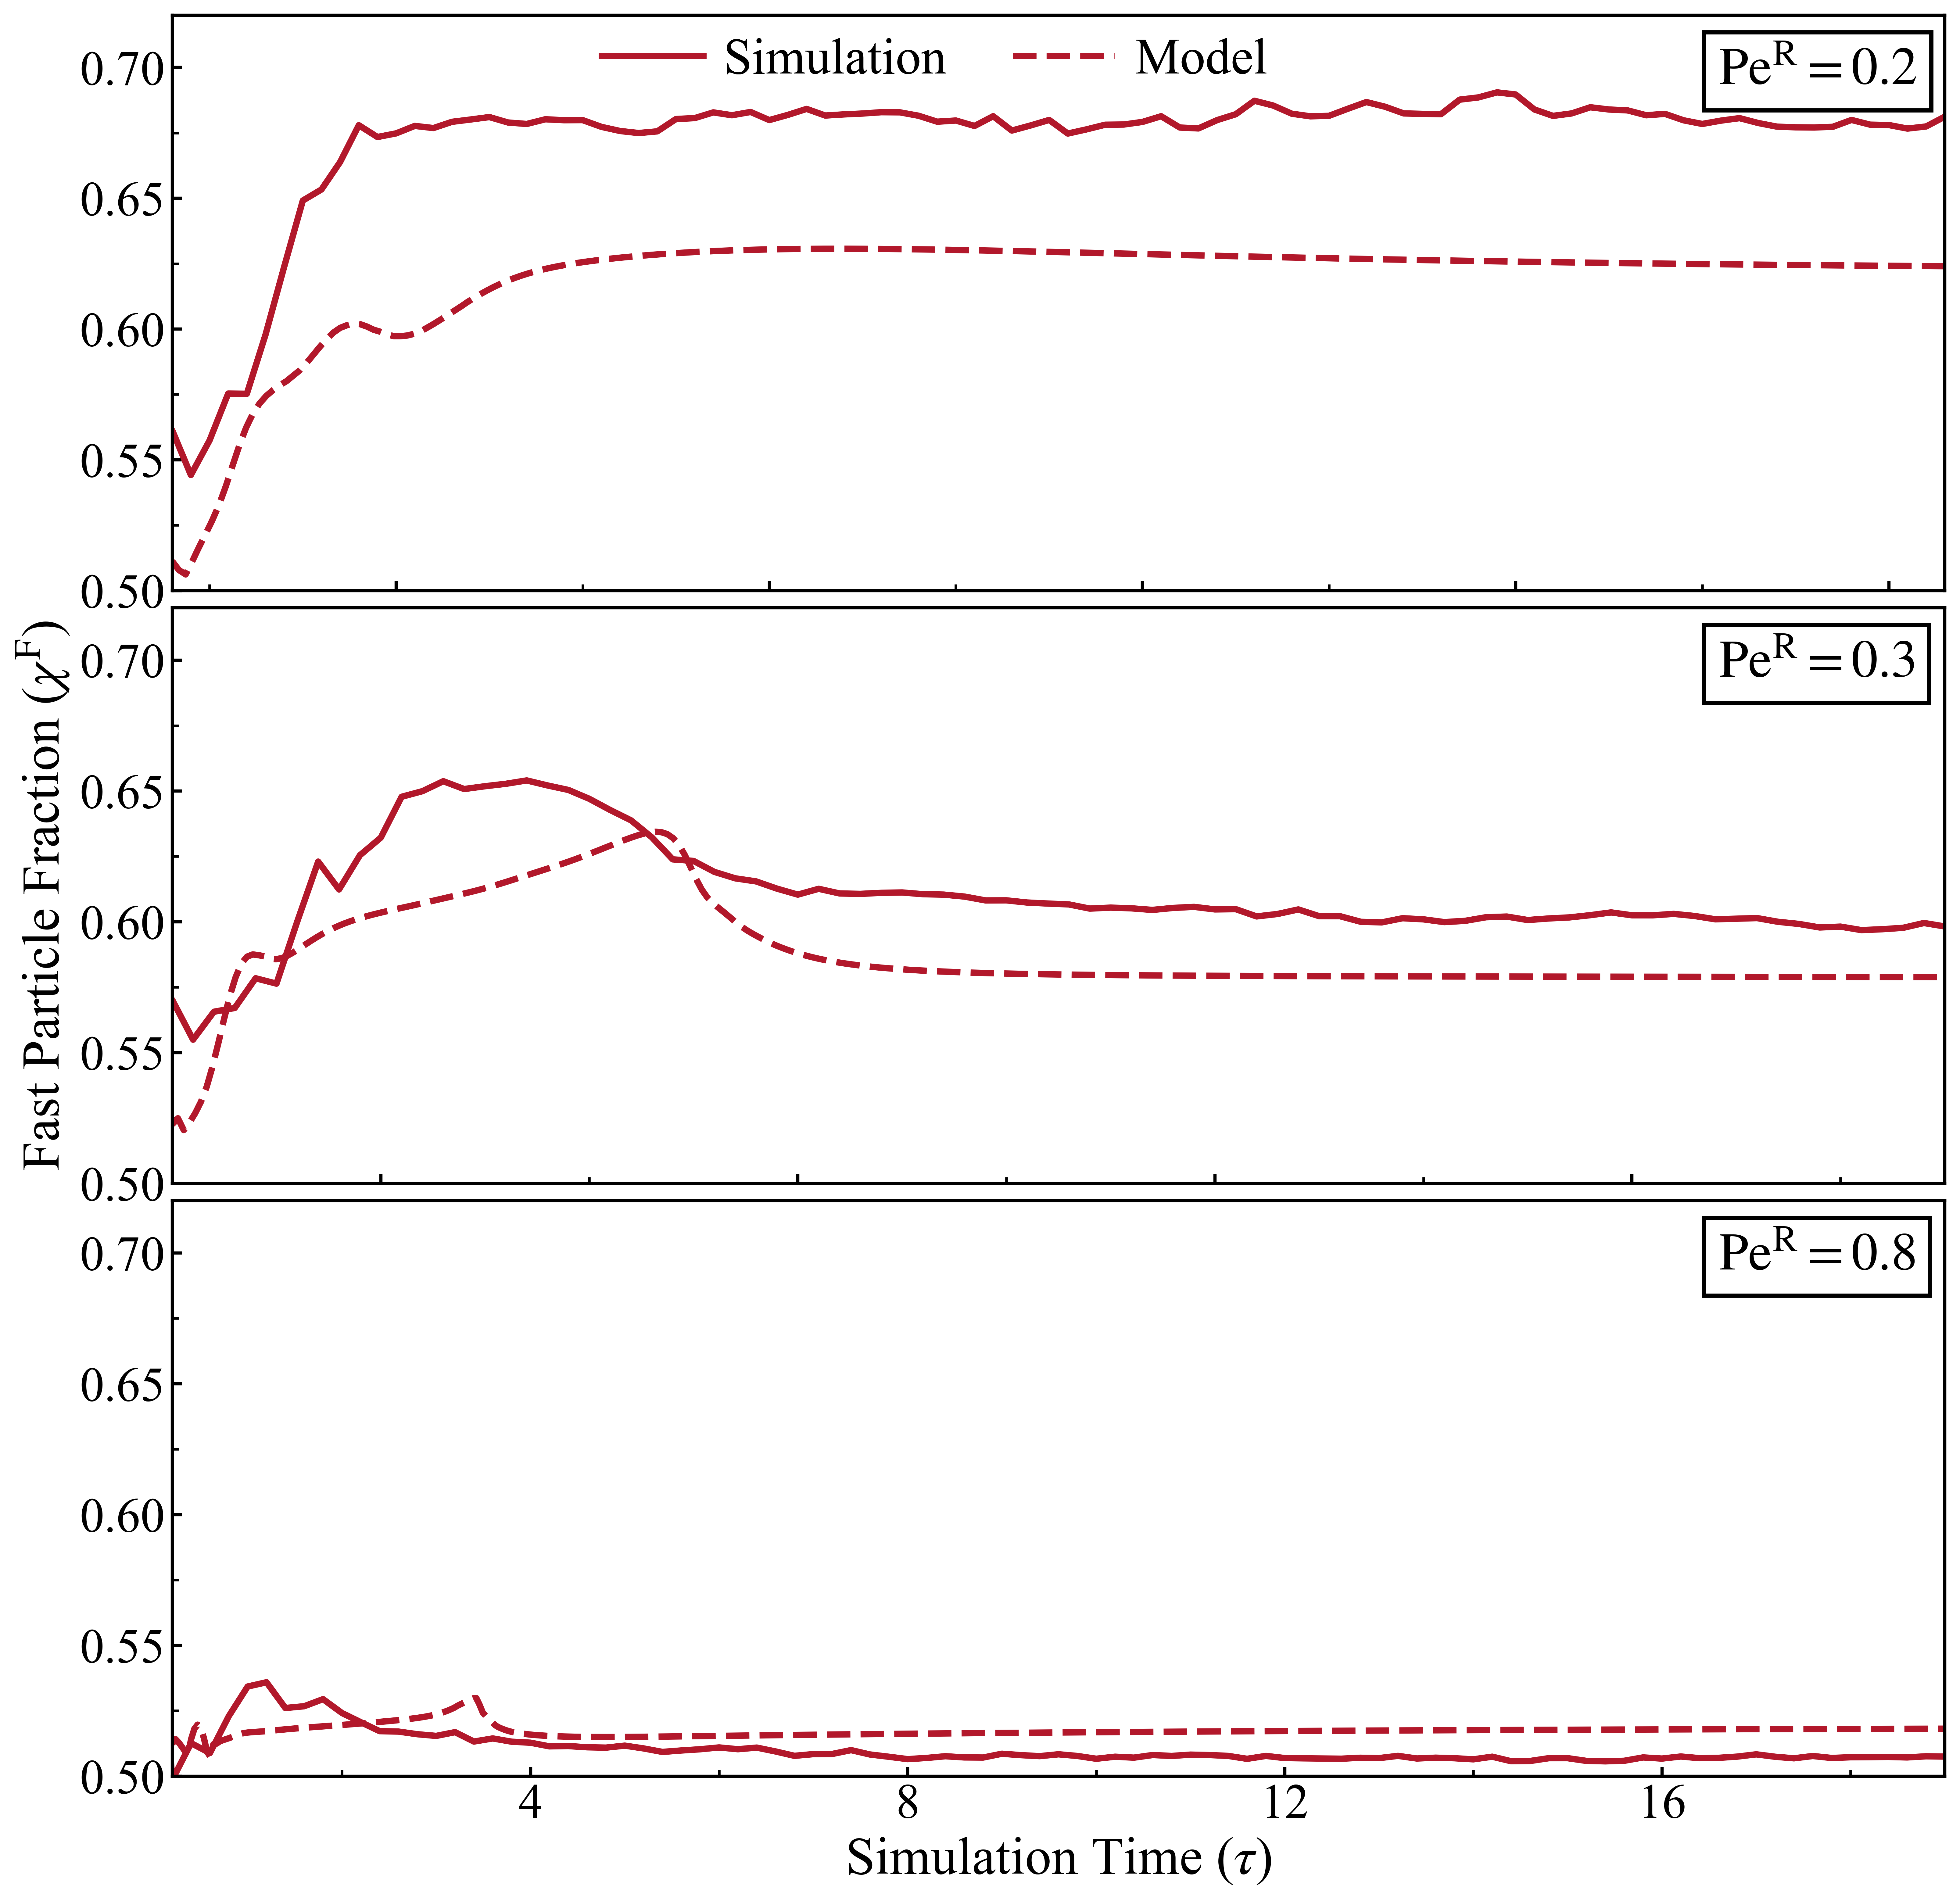

In [114]:
import matplotlib.pyplot as plt




def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 500./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=3, clip_on=False)

    ax.text((xmax+xmin)/2., yy+.11*yspan, text, ha='center', va='bottom', fontsize=2.7*fsize)
    






def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(3,1, figsize=(15,15))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"

interpart_peA = np.array([])
interpart_peB = np.array([])
interpart_xA = np.array([])
ind = 0

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


for k in range(0, len(all_pres)):
    if all_pres[k].empty:
        continue
    for l in range(0, len(all_pres2)):
        if all_pres2[l].empty:
            continue
        if (params2['peA'][k]==params3['peA'][l]) & (params2['peB'][k]==params3['peB'][l]):
            for m in range(0, len(all_pres3)):
                if all_pres3[m].empty:
                    continue
                if (params2['peA'][k]==params4['peA'][m]) & (params2['peB'][k]==params4['peB'][m]):
    
    
                    if (params2['peA'][k] == 100) | (params2['peA'][k] == 150) | (params2['peA'][k] == 200) | (params2['peA'][k] == 400):
                        print(params2['peA'][k])
                        time_k = all_pres[k]['tauB']
                        time_l = all_pres2[l]['tauB']
                        time_m = all_pres3[m]['tauB']

                        #time_ss = np.where((time_k>=150))[0]

                        print(len(time_k))
                        
                        step_size = 2
                        
                        frac_ssA = all_pres3[m]['A'][::step_size] / all_pres3[m]['all'][::step_size] 
                        frac_ssB = all_pres3[m]['B'][::step_size] / all_pres3[m]['all'][::step_size]
                        
                        frac_ssA_orig = all_pres3[m]['A'] / all_pres3[m]['all'] 
                        frac_ssB_orig = all_pres3[m]['B']/  all_pres3[m]['all']

                        
                        #if all_pres[k]['bulk'][::step_size]>0:
                        dens_ssA_bulk = (all_pres[k]['bulk_A'][::step_size] / (all_pres2[l]['bulk'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_bulk = (all_pres[k]['bulk_B'][::step_size] / (all_pres2[l]['bulk'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_int = (all_pres[k]['int_A'][::step_size] / (all_pres2[l]['int'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_int = (all_pres[k]['int_B'][::step_size] / (all_pres2[l]['int'][::step_size] * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_dense = ((all_pres[k]['bulk_A'][::step_size]+all_pres[k]['int_A'][::step_size]) / ((all_pres2[l]['bulk'][::step_size] + all_pres2[l]['int'][::step_size]) * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        dens_ssB_dense = ((all_pres[k]['bulk_B'][::step_size]+all_pres[k]['int_B'][::step_size]) / ((all_pres2[l]['bulk'][::step_size] + all_pres2[l]['int'][::step_size]) * all_pres2[l]['sizeBin_x'][::step_size] * all_pres2[l]['sizeBin_y'][::step_size]))
                        
                        dens_ssA_bulk_orig = (all_pres[k]['bulk_A'] / (all_pres2[l]['bulk'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_bulk_orig = (all_pres[k]['bulk_B'] / (all_pres2[l]['bulk'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        
                        dens_ssA_int_orig = (all_pres[k]['int_A'] / (all_pres2[l]['int'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_int_orig = (all_pres[k]['int_B'] / (all_pres2[l]['int'] * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        
                        dens_ssA_dense_orig = ((all_pres[k]['bulk_A']+all_pres[k]['int_A']) / ((all_pres2[l]['bulk'] + all_pres2[l]['int']) * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))
                        dens_ssB_dense_orig = ((all_pres[k]['bulk_B']+all_pres[k]['int_B']) / ((all_pres2[l]['bulk'] + all_pres2[l]['int']) * all_pres2[l]['sizeBin_x'] * all_pres2[l]['sizeBin_y']))

                        
                        #dens_ssA_int = (all_pres[k]['int_A'][::step_size] / (all_pres[k]['int'][::step_size] * all_pres[k]['sizeBin_x'][::step_size] * all_pres[k]['sizeBin_y'][::step_size]))
                        #dens_ssB_int = (all_pres[k]['int_B'][::step_size] / (all_pres[k]['int'][::step_size] * all_pres[k]['sizeBin_x'][::step_size] * all_pres[k]['sizeBin_y'][::step_size]))
                        
                        
                        

                        #ax1[ind].plot(time_m[::step_size], frac_ssA, linewidth=3.0, linestyle='solid', c=new_blue)
                        if ind !=2:
                            if ind == 3:
                                ind = ind - 1
                            if ind>0:
                                test_id = np.where(time_m>=100)[0]
                            else:
                                test_id = np.where(time_m>=400)[0]
                            ax1[ind].plot(time_m[::step_size], frac_ssB, linewidth=3.0, linestyle='solid', c=new_red)
                            #ax1[ind].plot([0, 600], [np.mean(frac_ssA_orig[test_id]), np.mean(frac_ssA_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_blue)
                            #ax1[ind].plot([0, 600], [np.mean(frac_ssB_orig[test_id]), np.mean(frac_ssB_orig[test_id])], linewidth=3.0, linestyle='dotted', c='black')


                            #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='solid', c=new_blue)
                            #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='solid', c=new_red)

                            #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='dashed', c=new_blue)
                            #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='dashed', c=new_red)

                            #ax1[ind].plot(time_k[::step_size], dens_ssA_bulk, linewidth=3.0, linestyle='dotted', c=new_blue)
                            #ax1[ind].plot(time_k[::step_size], dens_ssB_bulk, linewidth=3.0, linestyle='dotted', c=new_red)

                            #test_id = np.where(time_k>=100)[0]
                            #ax1[ind].plot([0, 600], [np.mean(dens_ssA_orig[test_id]), np.mean(dens_ssA_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_blue)
                            #ax1[ind].plot([0, 600], [np.mean(dens_ssB_orig[test_id]), np.mean(dens_ssB_orig[test_id])], linewidth=3.0, linestyle='dashed', c=new_red)



                            #for z in range(0, len(time_local_minimaA)):
                            #    ax1[ind].plot([time_local_minimaA[z], time_local_minimaA[z]], [0, 500], linestyle='dotted', linewidth=1.5, color='blue')
                            #for z in range(0, len(time_local_maximaB)):
                            #    ax1[ind].plot([time_local_maximaB[z], time_local_maximaB[z]], [0, 500], linestyle='dotted', linewidth=1.5, color='red')


                            interpart_peA = np.append(interpart_peA, params2['peA'][k])
                            interpart_peB = np.append(interpart_peB, params2['peB'][k])
                            interpart_xA = np.append(interpart_xA, params2['xA'][k])

                            fsize=10
                            ax1[ind].tick_params(axis='y', labelsize=fsize*2.3)
                            ax1[ind].tick_params(axis='x', labelsize=fsize*2.3)

                            loc = MultipleLocator(base=4)
                            ax1[ind].xaxis.set_major_locator(loc)
                            loc = MultipleLocator(base=2)
                            ax1[ind].xaxis.set_minor_locator(loc)

                            loc = MultipleLocator(base=0.05)
                            ax1[ind].yaxis.set_major_locator(loc)
                            loc = MultipleLocator(base=0.025)
                            ax1[ind].yaxis.set_minor_locator(loc)



                            #ax1[ind].set_ylabel(r'Cluster Size ($N$)', fontsize=fsize*2.5)    

                            if ind<2: 
                                ax1[ind].xaxis.set_tick_params(labelbottom=False)

                        ind += 1
print(time_arr_cont.iloc[:,-4].values)
test_1 = np.where(time_arr_cont.iloc[:,-3].values.astype(float)>0)[0]
#print(test_1)
#print(ar_cont[-4])
#stop
print(chi_arr_cont.iloc[:,-4].values.astype(float)[test_1])

test_1 = np.insert(test_1,0,0)
ax1[0].plot(393.6+time_arr_cont.iloc[:,-3].values.astype(float)[test_1], chi_arr_cont.iloc[:,-3].values.astype(float)[test_1], linewidth=3.0, linestyle='dashed', c=new_red)
#ax1[0].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

test_1 = np.where(time_arr_cont.iloc[:,-6].values.astype(float)>0)[0]
test_1 = np.insert(test_1,0,0)
ax1[1].plot(2+time_arr_cont.iloc[:,-6].values.astype(float)[test_1], chi_arr_cont.iloc[:,-6].values.astype(float)[test_1], linewidth=3.0, linestyle='dashed', c=new_red)
#ax1[1].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

test_1 = np.where(time_arr_cont.iloc[:,-12].values.astype(float)>0)[0]
test_1 = np.insert(test_1,0,0)
ax1[2].plot(0.2+time_arr_cont.iloc[:,-12].values.astype(float)[test_1], chi_arr_cont.iloc[:,-12].values.astype(float)[test_1], linewidth=3.0, linestyle='dashed', c=new_red)
#ax1[3].plot([0, 600], [0, 0], linewidth=3.0, linestyle='dotted', c='black')

ax1[1].set_ylabel(r'Fast Particle Fraction ($\chi^\mathrm{F}$)', fontsize=fsize*2.5) 
                    
ax1[0].set_xlim([393.6, 412.6])
ax1[1].set_xlim([2.0, 19])
ax1[2].set_xlim([0.2, 19])

#ax1[0].plot([399.5, 399.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[1].plot([18, 18], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[2].plot([13.5, 13.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[3].plot([6.5, 6.5], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')

#ax1[0].fill_betweenx(y=[-500000, 500000], x1=[399.5, 399.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[0].fill_betweenx(y=[-500000, 500000], x1=[393.6, 393.6], x2=[399.5, 399.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
#ax1[0].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[393.8, 393.8], zorder=-1, color='red', edgecolor='None', alpha=0.2)


#ax1[1].fill_betweenx(y=[-500000, 500000], x1=[18, 18], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[1].fill_betweenx(y=[-500000, 500000], x1=[2, 2], x2=[18, 18], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
#ax1[1].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[2, 2], zorder=-1, color='red', edgecolor='None', alpha=0.2)

#ax1[2].fill_betweenx(y=[-500000, 500000], x1=[13.5, 13.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[2].fill_betweenx(y=[-500000, 500000], x1=[0.8, 0.8], x2=[13.5, 13.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)
#ax1[2].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[0.8, 0.8], zorder=-1, color='red', edgecolor='None', alpha=0.2)

#ax1[3].fill_betweenx(y=[-500000, 500000], x1=[6.5, 6.5], x2=[600, 600], zorder=-1, color='green', edgecolor='None', alpha=0.2)
#ax1[3].fill_betweenx(y=[-500000, 500000], x1=[0, 0], x2=[6.5, 6.5], zorder=-1, color='yellow', edgecolor='None', alpha=0.2)


#ax1[0].plot([393.8, 393.8], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[1].plot([2, 2], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[2].plot([0.8, 0.8], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')
#ax1[3].plot([0, 0], [-100000, 100000], linewidth=2.0, linestyle='dashed', c='black')

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')
ax1[2].set_xlabel(r'Simulation Time ($\tau_\mathrm{B}$)', fontsize=fsize*2.5)                    

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[0].set_ylim([0.5,0.72])
ax1[1].set_ylim([0.5,0.72])
ax1[2].set_ylim([0.5,0.72])

#ax1[0].set_ylim([0.0,2.0])
#ax1[1].set_ylim([0.0,2.0])
#ax1[2].set_ylim([0.0,2.0])
#ax1[3].set_ylim([0.0,2.0])


#ax1[0].set_ylim([0.0,25000])
#ax1[1].set_ylim([0.0,25000])
#ax1[2].set_ylim([0.0,25000])
#ax1[3].set_ylim([0.0,25000])

#ax1[0].set_yticks([0.65, 1.0, 1.35])
#ax1[0].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[1].set_yticks([0.65, 1.0, 1.35])
#ax1[1].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[2].set_yticks([0.65, 1.0, 1.35])
#ax1[2].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

#ax1[3].set_yticks([0.65, 1.0, 1.35])
#ax1[3].set_yticks([0.475 , 0.825, 1.0, 1.175, 1.525], minor = True)

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

#one_leg = ax1[0,0].legend(handles=fast_leg, loc='center',
#             columnspacing=0.0, handletextpad=-0.1,
#             bbox_transform=ax1[0,0].transAxes, bbox_to_anchor=[0.11, 0.78],
#             fontsize=fsize*2.5, frameon=True, ncol=1, edgecolor='black')
#one_leg.get_frame().set_linewidth(2.0)
#one_leg.get_frame().set_alpha(1.0)
#ax1[0,0].add_artist(one_leg)
"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10



msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D



regime1_c = '#fdfd96'             

#test_id = np.where(time_num_dens>100)[0]
#ax1[1,0].plot([0, 500], [np.mean(int_nA_arr[test_id]), np.mean(int_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(int_nB_arr[test_id]), np.mean(int_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(bulk_nA_arr[test_id]), np.mean(bulk_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1,0].plot([0, 500], [np.mean(bulk_nB_arr[test_id]), np.mean(bulk_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#ax1[0,0].plot([0, 500], [np.mean(int_nA_arr[test_id]), np.mean(int_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(int_nB_arr[test_id]), np.mean(int_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(bulk_nA_arr[test_id]), np.mean(bulk_nA_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0,0].plot([0, 500], [np.mean(bulk_nB_arr[test_id]), np.mean(bulk_nB_arr[test_id])], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D
                    
fsize=10

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

t1 = ax1[0].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.2$', fontsize=fsize*2.5, transform=ax1[0].transAxes)
t2 = ax1[1].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.3$', fontsize=fsize*2.5, transform=ax1[1].transAxes)
t4 = ax1[2].text(0.8725,0.88, s=r'$\mathrm{Pe}^\mathrm{R}=0.8$', fontsize=fsize*2.5, transform=ax1[2].transAxes)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t2.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))
t4.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0, pad=7.0))



fast_leg=[]
fast_leg.append(Line2D([0], [0], marker='o', markeredgewidth=1.8*2,
                      markeredgecolor='None',
                      markerfacecolor='None', linestyle='solid', lw=3, color=new_red,
                      label='Simulation', markersize=(0.85*3.3*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], marker='+', markeredgewidth=1.8*2,
                      markeredgecolor='None',
                      markerfacecolor='None', linestyle='dashed', lw=3, color=new_red,
                      label='Model', markersize=(3.3*msz * mkSz[0])))
#one_leg = ax3.legend(handles=fast_leg, loc='center',
#             columnspacing=0.08, handletextpad=0.4,
#             bbox_transform=ax3.transAxes, bbox_to_anchor=[0.795, 0.895],
#             fontsize=fsize*2.4, frameon=True, ncol=1, edgecolor='black')
one_leg = ax1[0].legend(handles=fast_leg, loc='center',
             columnspacing=1.3, handletextpad=0.4,
             bbox_transform=ax1[0].transAxes, bbox_to_anchor=[0.43, 0.92],
             fontsize=fsize*2.4, frameon=False, ncol=2)
#one_leg.get_frame().set_linewidth(2.0)
#one_leg.get_frame().set_alpha(1.0)
ax1[0].add_artist(one_leg)

#draw_brace(ax1[0], (390.1,393.7), 0.72, r'Dilute')
#draw_brace(ax1[0], (393.9,399.4), 0.72, r'Cluster Growth')
#draw_brace(ax1[0], (399.6,414.9), 0.72, r'Steady State')


fig.subplots_adjust(wspace=0.02)
ax1[2].set_xlabel(r'Simulation Time ($\tau$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.savefig('si_fig_7.png',  dpi=200, pad_inches=0.0, transparent=False, bbox_inches='tight')
plt.show()
